In [2]:
import pandas as pd
import os

In [3]:
# Define the new working directory path
new_working_directory = r'C:\Users\Victor\Documents\GitHub\sports-data'

# Change the current working directory
os.chdir(new_working_directory)

In [4]:
# Define the path 
data_folder = 'data/'

# Load the CSV files to df
df = pd.read_csv(data_folder + 'cleaned_df.csv')

In [5]:
# DataFrame head
print(df.head())

# DataFrame info
print(df.info())

# Describe basic stats of features
print(df.describe())



   player_id                name  country  height   foot  position  \
0     122011    Markus Henriksen   Norway   187.0  right  Defender   
1      14940          Razvan Rat  Romania   179.0   left  Defender   
2      14942         Darijo Srna  Croatia   182.0  right  Defender   
3      26267         Fernandinho   Brazil   179.0  right  Midfield   
4      55735  Henrikh Mkhitaryan  Armenia   177.0   both  Midfield   

   highest_market_value current_club_domestic_competition_id  \
0             5000000.0                                  GB1   
1             6500000.0                                  ES1   
2            17500000.0                                  IT1   
3            32000000.0                                  GB1   
4            37000000.0                                  IT1   

   number_games_played  total_minutes  ...  red_cards_sum  red_cards_avg  \
0                  165          12199  ...              1       0.006061   
1                   97           7690  ...

Data division

In [6]:
from sklearn.model_selection import train_test_split

# drop NaN values
df = df.dropna()

# Divide data into IV (X) y DV (y)
X = df[['number_games_played', 'total_minutes', 'average_minutes', 'yellow_cards_sum', 
          'yellow_cards_avg', 'red_cards_sum', 'red_cards_avg', 'goals', 'avg_goals_per_game', 
          'assists', 'age', 'year', 'avg_games_per_year', 'avg_goals_per_year', 'avg_assists_per_year']]
y = df['highest_market_value']

# Divide data into trial and error 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training the model

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression Model
model = LinearRegression()

# Train
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Evaluación del modelo con el conjunto de prueba
score = model.score(X_test, y_test)
print("Coeficiente de determinación R^2:", score)

Coeficiente de determinación R^2: 0.5127282926076093


**Correlation Analysis**

In [9]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print corr matrix
print(correlation_matrix['highest_market_value'].sort_values(ascending=False))



highest_market_value    1.000000
assists                 0.646891
avg_assists_per_year    0.631621
number_games_played     0.616893
goals                   0.602605
total_minutes           0.601384
avg_games_per_year      0.597863
avg_goals_per_year      0.596332
year                    0.491840
yellow_cards_sum        0.466338
avg_goals_per_game      0.381532
red_cards_sum           0.235901
average_minutes         0.203727
age                     0.083384
yellow_cards_avg        0.030845
player_id               0.008850
height                 -0.001299
red_cards_avg          -0.012023
Name: highest_market_value, dtype: float64


**Correlation plots**

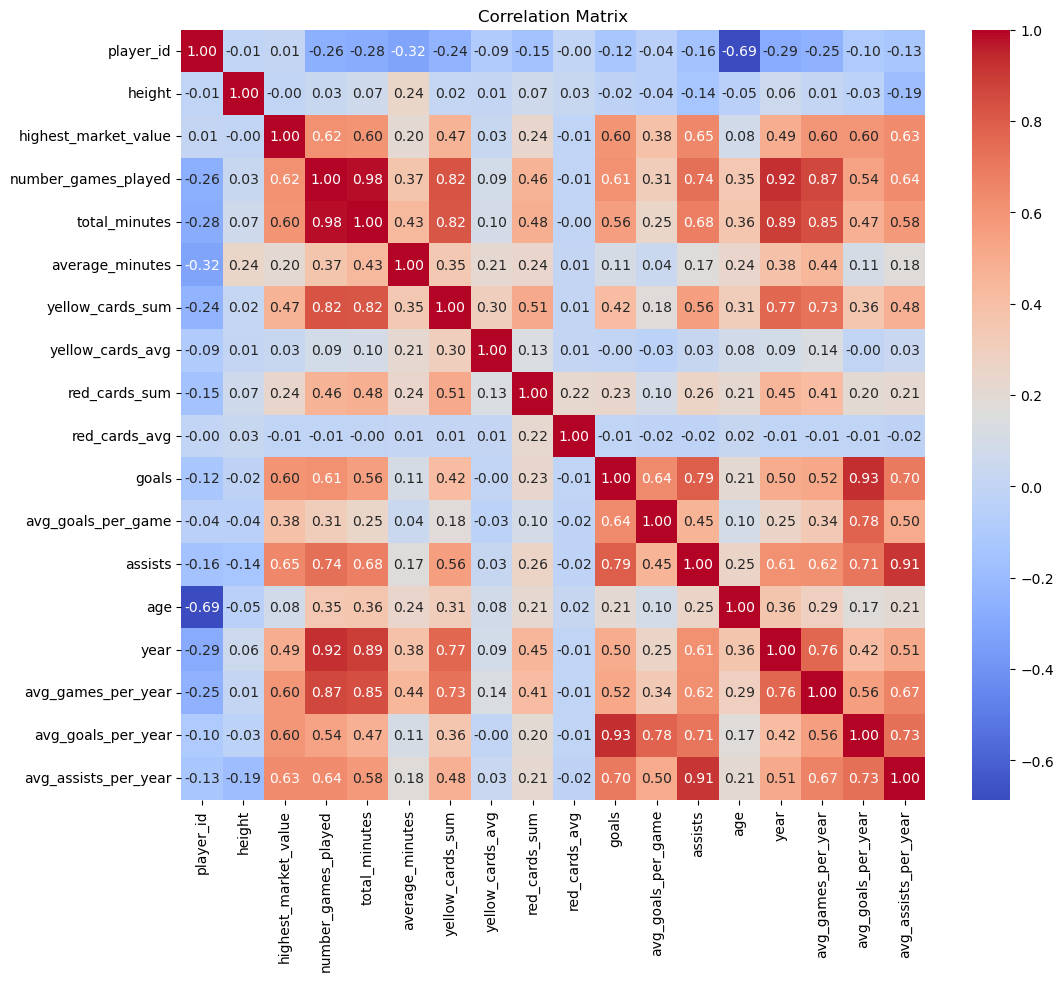

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Conclusions post Correlation Analysis**

**- Highly Positively Correlated Variables:**

'assists', 'number_games_played', 'avg_assists_per_year', 'goals', 'total_minutes', 'avg_games_per_year', 'avg_goals_per_year', 'year', 'avg_goals_per_game' have strong positive correlations with 'highest_market_value'. This suggests that as these variables increase, the player's market value is likely to increase as well.

**- Weakly Positively Correlated Variables:**

'yellow_cards_sum' has a moderate positive correlation with 'highest_market_value'. This suggests that there is a relationship, but not as strong as the variables mentioned above.

**- Variables with Weak or Negative Correlations:**

'red_cards_sum', 'average_minutes', 'player_id', 'height', 'age', 'red_cards_avg', 'yellow_cards_avg' have weak or negative correlations with 'highest_market_value'. This suggests that these variables have limited or even contrary influence on the player's market value.

**Model Improvements**

**Include Interactions and Polynomials:** 

You can explore including interactions between variables and polynomial terms to capture nonlinear relationships between features and the player's market value.

**Regularization:** 

Consider using regularization techniques like Lasso or Ridge to prevent overfitting and improve model generalization.

**Feature Engineering:** 

Create new features that might better capture the relationship with the player's market value. For example, you could create a feature representing the player's relative position in their team in terms of statistical performance.

**Feature Selection:** 

Perform feature selection to remove those features that have minimal influence on predicting the player's market value. This can help simplify the model and reduce complexity.

**Cross-Validation:** 

Utilize cross-validation to robustly evaluate the model's performance and select optimal hyperparameters.

**Explore Other Models:** 

Try other regression models such as Random Forest, Gradient Boosting, Support Vector Regression, etc., to see if they provide better predictive capability compared to linear regression.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())

# Train the polynomial model
poly_model.fit(X_train, y_train)

# Evaluate the polynomial model
poly_score = poly_model.score(X_test, y_test)
print("R^2 score of polynomial model:", poly_score)


R^2 score of polynomial model: 0.6670299587866322


In [16]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the regularization strength (alpha)

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Evaluate the Ridge model
ridge_score = ridge_model.score(X_test, y_test)
print("R^2 score of Ridge model:", ridge_score)


R^2 score of Ridge model: 0.6090661892819124


In [27]:
# Example: Create a new feature representing the player's relative performance by combining 'assists' and 'goals'
df['performance_ratio'] = df['assists'] / df['goals']

# Update the X and y datasets with the new feature
X_cleaned_fe = df[['number_games_played', 'total_minutes', 'average_minutes', 'yellow_cards_sum', 
          'yellow_cards_avg', 'red_cards_sum', 'red_cards_avg', 'goals', 'avg_goals_per_game', 
          'assists', 'age', 'year', 'avg_games_per_year', 'avg_goals_per_year', 'avg_assists_per_year', 'performance_ratio']]
y_cleaned_fe = df['highest_market_value']

# Split the data into training and testing sets again
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_cleaned_fe, y_cleaned_fe, test_size=0.2, random_state=42)

# Train the model with the new feature
model.fit(X_train_fe, y_train_fe)

# Evaluate the model with the new feature
score_fe = model.score(X_test_fe, y_test_fe)
print("R^2 score with feature engineering:", score_fe)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top k best features based on F-test
k_best_features = SelectKBest(score_func=f_regression, k=10)  # You can adjust the number of features (k)

# Fit the feature selector to the training data
k_best_features.fit(X_train, y_train)

# Transform the training and testing data to select the top k features
X_train_selected = k_best_features.transform(X_train)
X_test_selected = k_best_features.transform(X_test)

# Train the model with the selected features
model.fit(X_train_selected, y_train)

# Evaluate the model with the selected features
score_selected = model.score(X_test_selected, y_test)
print("R^2 score with feature selection:", score_selected)


R^2 score with feature selection: 0.6080133755465167


**Cross-Validation**

In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with Linear Regression
cv_scores_linear = cross_val_score(model, X_train, y_train_fe, cv=5)  # You can adjust the number of folds (cv)

# Calculate the mean R^2 score and its standard deviation
mean_cv_score_linear = cv_scores_linear.mean()
std_cv_score_linear = cv_scores_linear.std()

print("Cross-Validation R^2 score with Linear Regression:", mean_cv_score_linear)
print("Standard deviation of Cross-Validation R^2 score with Linear Regression:", std_cv_score_linear)


Cross-Validation R^2 score with Linear Regression: 0.6224864789198568
Standard deviation of Cross-Validation R^2 score with Linear Regression: 0.012832072116115534


**Random Forest Regression**

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Train the Random Forest model
rf_model.fit(X_train, y_train_fe)

# Evaluate the Random Forest model
rf_score = rf_model.score(X_test, y_test_fe)
print("R^2 score with Random Forest Regression:", rf_score)


R^2 score with Random Forest Regression: 0.9651845134468401


**Gradient Boosting Regression**

In [25]:

from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # You can adjust hyperparameters

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train_fe)

# Evaluate the Gradient Boosting model
gb_score = gb_model.score(X_test, y_test_fe)
print("R^2 score with Gradient Boosting Regression:", gb_score)

R^2 score with Gradient Boosting Regression: 0.8013417684444153


**Support Vector Regression (SVR)**

In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize SVR model with pipeline for scaling
svr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))  # You can adjust hyperparameters

# Train the SVR model
svr_model.fit(X_train, y_train_fe)

# Evaluate the SVR model
svr_score = svr_model.score(X_test, y_test_fe)
print("R^2 score with Support Vector Regression:", svr_score)

R^2 score with Support Vector Regression: -0.12846486917245725


**Conclusion ...**

**Filter by Defender & Mitfielder**

Now we are going to proceed to repeat the process by filtering the dataset by the 'Defender' & 'Midfield' position, and take a look at the features that can influence more in a Midfielder Market Value

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Filter the original DataFrame by the 'Defender' position
defender_df = df[df['position'] == 'Defender']

# Update X and y with the new filtered DataFrame
X_defender = defender_df[['number_games_played', 'total_minutes', 'average_minutes', 'yellow_cards_sum', 
          'yellow_cards_avg', 'red_cards_sum', 'red_cards_avg', 'goals', 'avg_goals_per_game', 
          'assists', 'age', 'year', 'avg_games_per_year', 'avg_goals_per_year', 'avg_assists_per_year']]
y_defender = defender_df['highest_market_value']

# Split the data into training and testing sets
X_train_defender, X_test_defender, y_train_defender, y_test_defender = train_test_split(X_defender, y_defender, test_size=0.2, random_state=42)

# Apply imputation to the data
imputer = SimpleImputer(strategy='mean')
X_train_defender_imputed = imputer.fit_transform(X_train_defender)
X_test_defender_imputed = imputer.transform(X_test_defender)

# Initialize models
model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
svr_model = SVR()

# Train the linear model
model.fit(X_train_defender_imputed, y_train_defender)

# Evaluate the linear model
score_defender = model.score(X_test_defender_imputed, y_test_defender)
print("R^2 score with Linear Regression for Defenders:", score_defender)

# Perform cross-validation with the linear model
cv_scores_defender_linear = cross_val_score(model, X_train_defender_imputed, y_train_defender, cv=5)
mean_cv_score_defender_linear = cv_scores_defender_linear.mean()
std_cv_score_defender_linear = cv_scores_defender_linear.std()

print("Cross-Validation R^2 score with Linear Regression for Defenders:", mean_cv_score_defender_linear)
print("Standard deviation of Cross-Validation R^2 score with Linear Regression for Defenders:", std_cv_score_defender_linear)

# Train and evaluate other models
rf_model.fit(X_train_defender_imputed, y_train_defender)
rf_score_defender = rf_model.score(X_test_defender_imputed, y_test_defender)
print("R^2 score with Random Forest Regression for Defenders:", rf_score_defender)

gb_model.fit(X_train_defender_imputed, y_train_defender)
gb_score_defender = gb_model.score(X_test_defender_imputed, y_test_defender)
print("R^2 score with Gradient Boosting Regression for Defenders:", gb_score_defender)

svr_model.fit(X_train_defender_imputed, y_train_defender)
svr_score_defender = svr_model.score(X_test_defender_imputed, y_test_defender)
print("R^2 score with Support Vector Regression for Defenders:", svr_score_defender)

R^2 score with Linear Regression for Defenders: 0.5091598228999954
Cross-Validation R^2 score with Linear Regression for Defenders: 0.5176423265524981
Standard deviation of Cross-Validation R^2 score with Linear Regression for Defenders: 0.019355840041258395
R^2 score with Random Forest Regression for Defenders: 0.9403672563055718
R^2 score with Gradient Boosting Regression for Defenders: 0.8163755029820294
R^2 score with Support Vector Regression for Defenders: -0.1216198708176135


In [32]:
# Filter the original DataFrame by the 'Midfield' position
midfield_df = df[df['position'] == 'Midfield']

# Update X and y with the new filtered DataFrame
X_midfield = midfield_df[['number_games_played', 'total_minutes', 'average_minutes', 'yellow_cards_sum', 
          'yellow_cards_avg', 'red_cards_sum', 'red_cards_avg', 'goals', 'avg_goals_per_game', 
          'assists', 'age', 'year', 'avg_games_per_year', 'avg_goals_per_year', 'avg_assists_per_year']]
y_midfield = midfield_df['highest_market_value']

# Split the data into training and testing sets
X_train_midfield, X_test_midfield, y_train_midfield, y_test_midfield = train_test_split(X_midfield, y_midfield, test_size=0.2, random_state=42)

# Apply imputation to the data
imputer = SimpleImputer(strategy='mean')
X_train_midfield_imputed = imputer.fit_transform(X_train_midfield)
X_test_midfield_imputed = imputer.transform(X_test_midfield)

# Initialize models
model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
svr_model = SVR()

# Train the linear model
model.fit(X_train_midfield_imputed, y_train_midfield)

# Evaluate the linear model
score_midfield = model.score(X_test_midfield_imputed, y_test_midfield)
print("R^2 score with Linear Regression for Midfielders:", score_midfield)

# Perform cross-validation with the linear model
cv_scores_midfield_linear = cross_val_score(model, X_train_midfield_imputed, y_train_midfield, cv=5)
mean_cv_score_midfield_linear = cv_scores_midfield_linear.mean()
std_cv_score_midfield_linear = cv_scores_midfield_linear.std()

print("Cross-Validation R^2 score with Linear Regression for Midfielders:", mean_cv_score_midfield_linear)
print("Standard deviation of Cross-Validation R^2 score with Linear Regression for Midfielders:", std_cv_score_midfield_linear)

# Train and evaluate other models
rf_model.fit(X_train_midfield_imputed, y_train_midfield)
rf_score_midfield = rf_model.score(X_test_midfield_imputed, y_test_midfield)
print("R^2 score with Random Forest Regression for Midfielders:", rf_score_midfield)

gb_model.fit(X_train_midfield_imputed, y_train_midfield)
gb_score_midfield = gb_model.score(X_test_midfield_imputed, y_test_midfield)
print("R^2 score with Gradient Boosting Regression for Midfielders:", gb_score_midfield)

svr_model.fit(X_train_midfield_imputed, y_train_midfield)
svr_score_midfield = svr_model.score(X_test_midfield_imputed, y_test_midfield)
print("R^2 score with Support Vector Regression for Midfielders:", svr_score_midfield)


R^2 score with Linear Regression for Midfielders: 0.6020284045849082
Cross-Validation R^2 score with Linear Regression for Midfielders: 0.5860148269786745
Standard deviation of Cross-Validation R^2 score with Linear Regression for Midfielders: 0.05130052743860779
R^2 score with Random Forest Regression for Midfielders: 0.9616070298915362
R^2 score with Gradient Boosting Regression for Midfielders: 0.862069975357715
R^2 score with Support Vector Regression for Midfielders: -0.1541796721919768


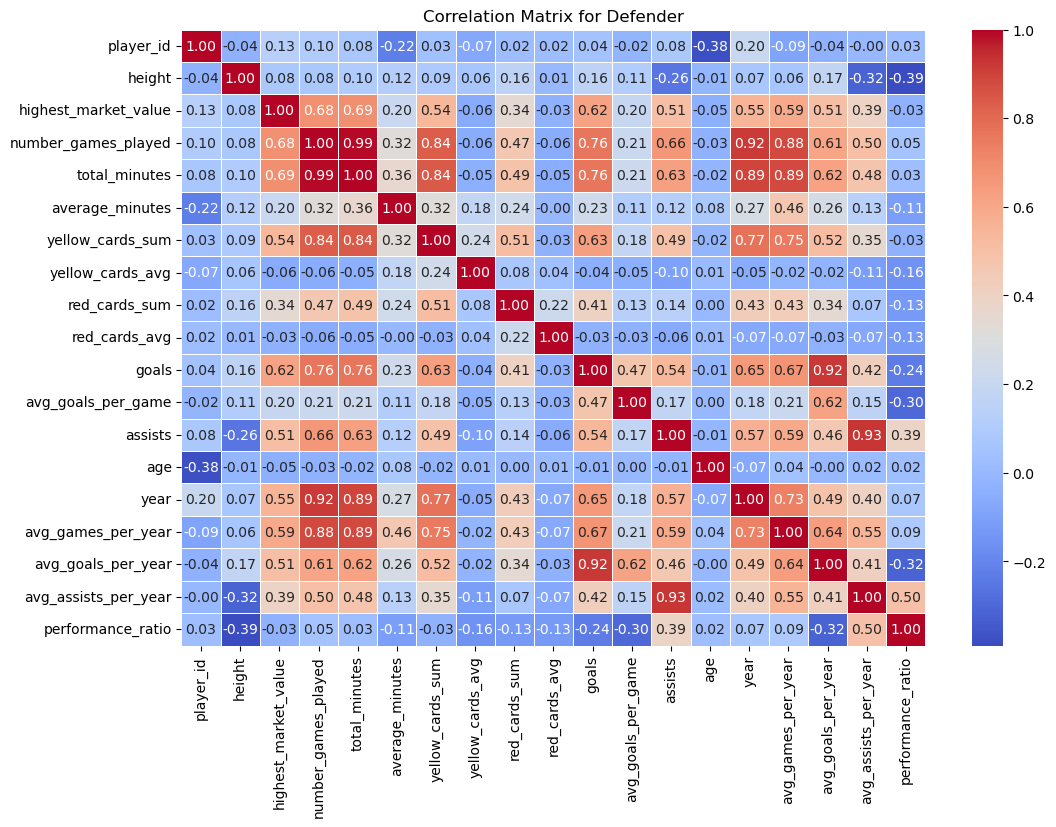

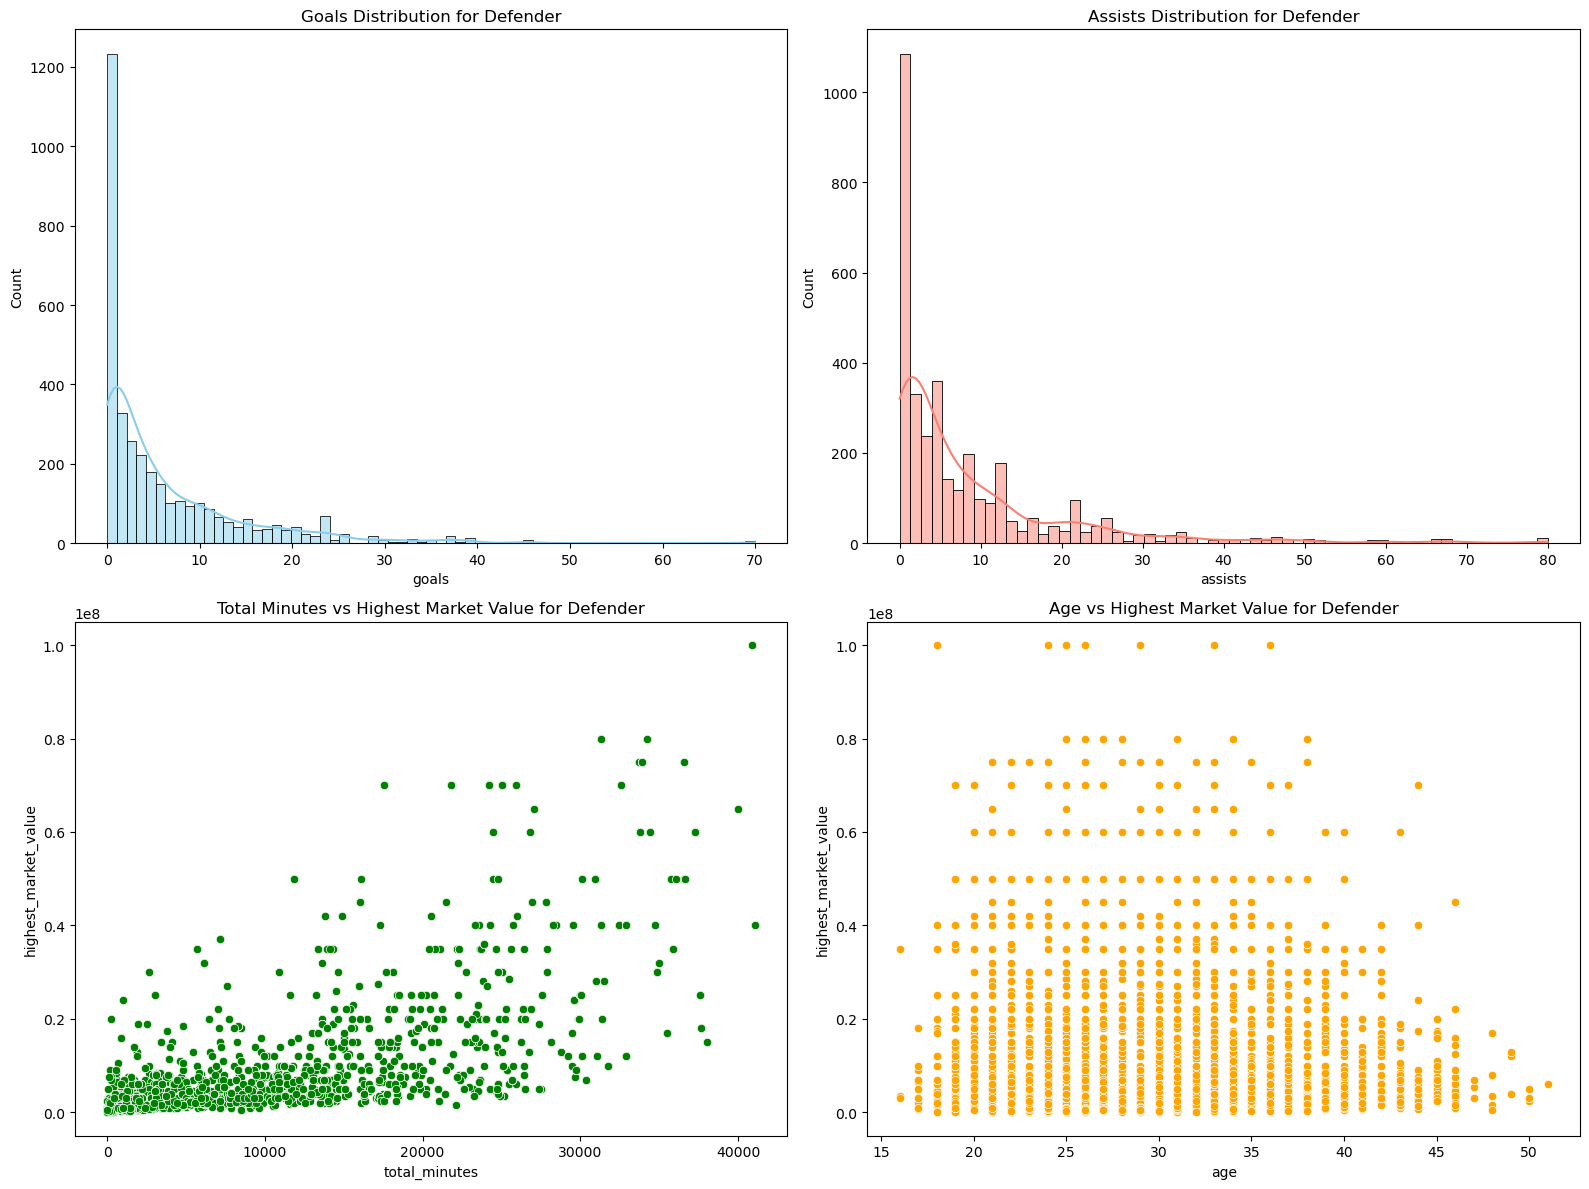

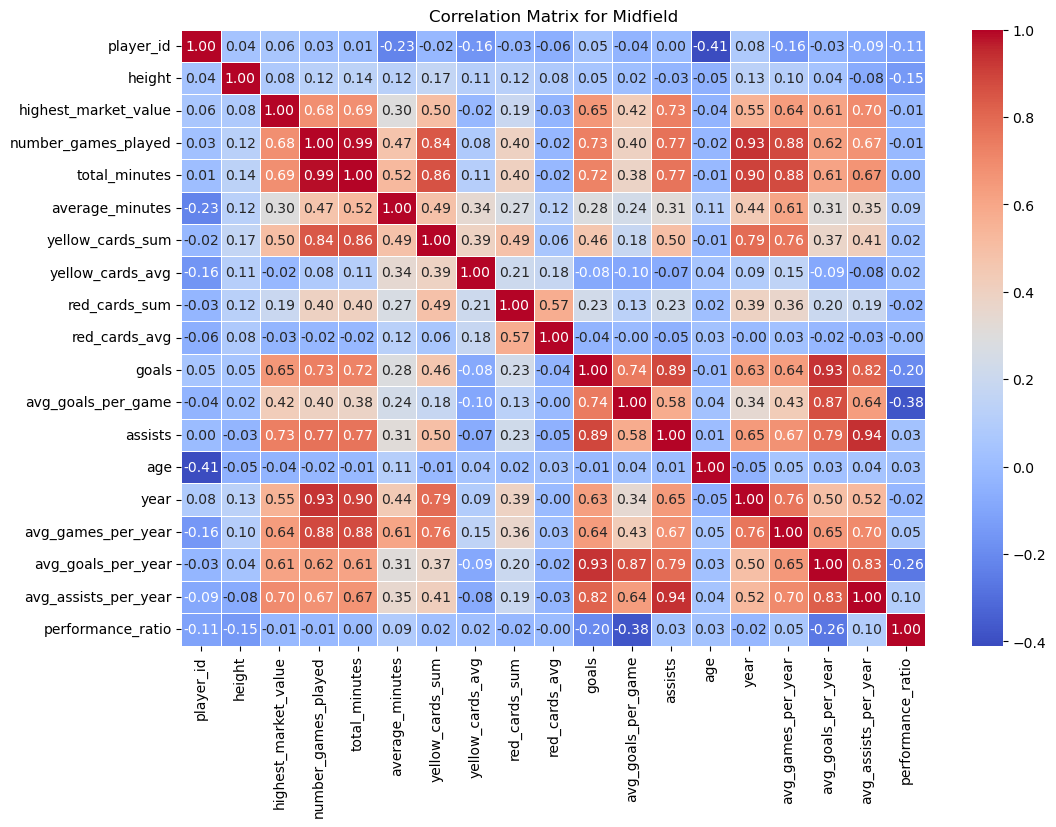

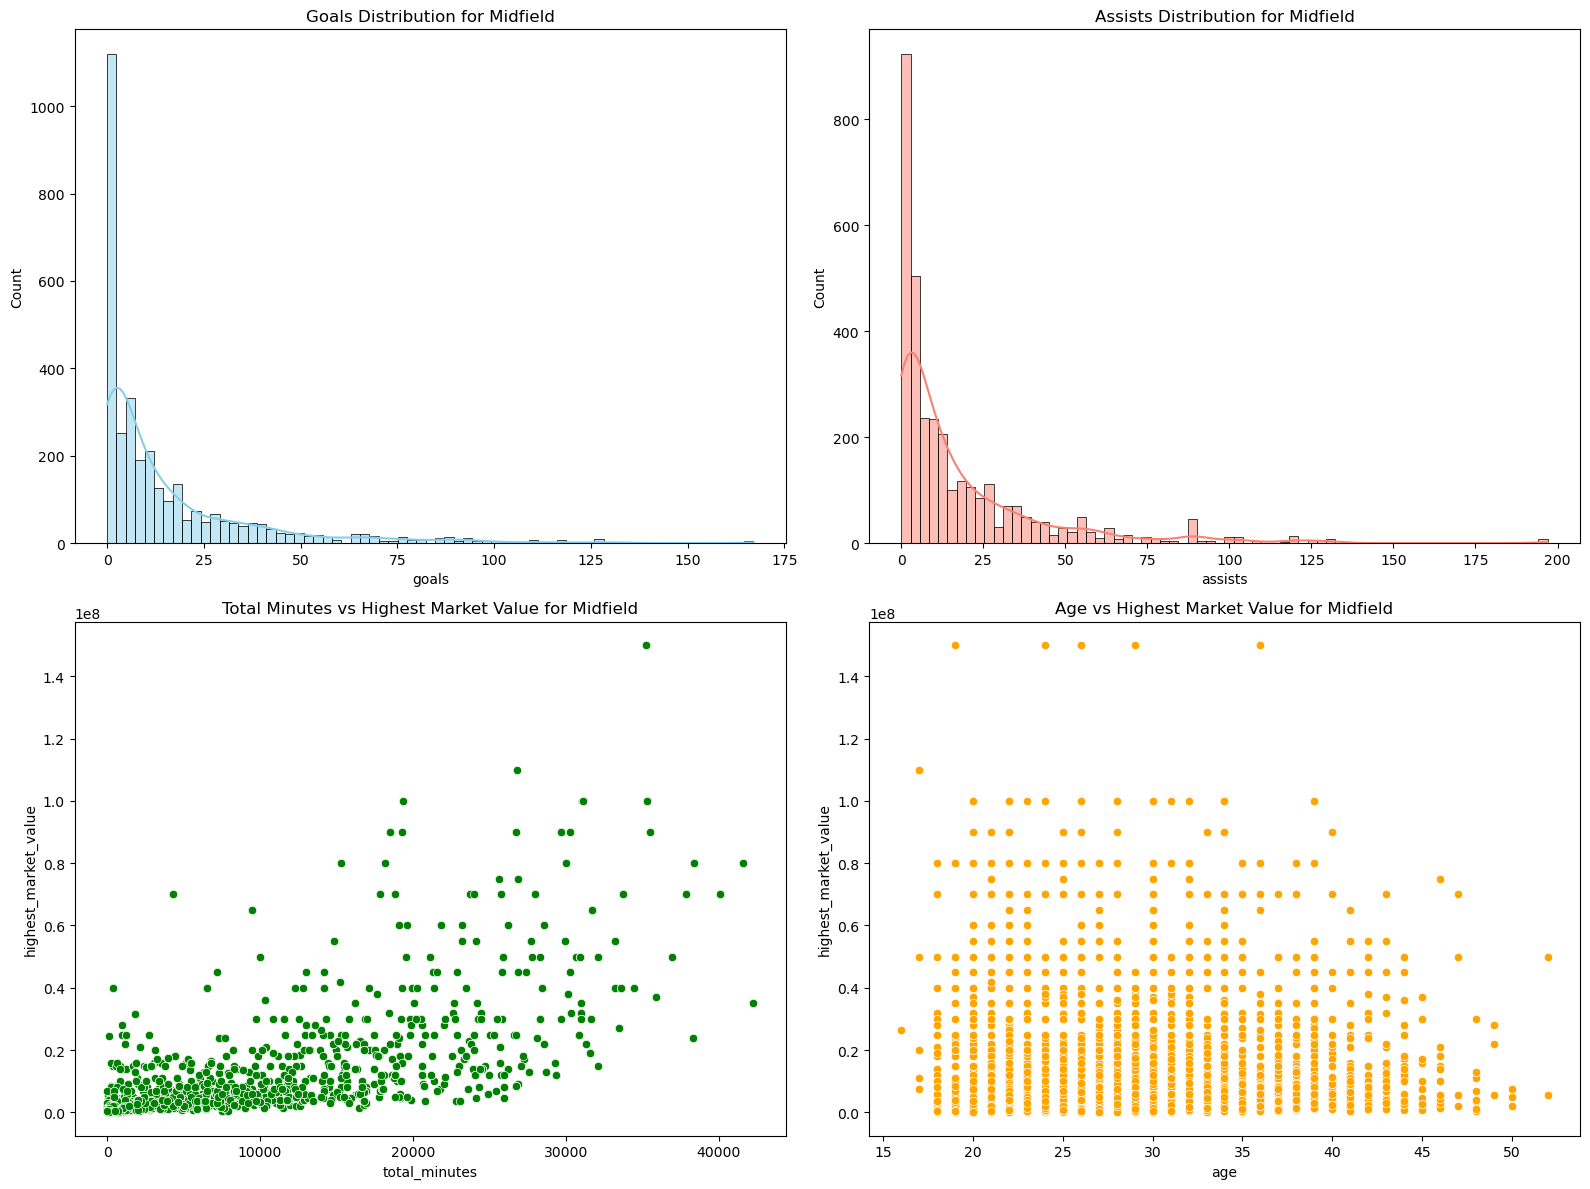

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot correlation matrix
def plot_correlation_matrix(data, title):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

# Function to plot insightful plots
def plot_insightful_plots(data, position):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    
    sns.histplot(data['goals'], kde=True, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title(f'Goals Distribution for {position}')
    
    sns.histplot(data['assists'], kde=True, ax=axes[0, 1], color='salmon')
    axes[0, 1].set_title(f'Assists Distribution for {position}')
    
    sns.scatterplot(x='total_minutes', y='highest_market_value', data=data, ax=axes[1, 0], color='green')
    axes[1, 0].set_title(f'Total Minutes vs Highest Market Value for {position}')
    
    sns.scatterplot(x='age', y='highest_market_value', data=data, ax=axes[1, 1], color='orange')
    axes[1, 1].set_title(f'Age vs Highest Market Value for {position}')
    
    plt.tight_layout()
    plt.show()

# Plot insightful plots for Defender
plot_correlation_matrix(defender_df, "Correlation Matrix for Defender")
plot_insightful_plots(defender_df, "Defender")

# Plot insightful plots for Midfield
plot_correlation_matrix(midfield_df, "Correlation Matrix for Midfield")
plot_insightful_plots(midfield_df, "Midfield")